In [130]:
YALEFACES_DIRECTORY = "C:\\Users\\taij\\\Documents\\Calvin\\MyProjects\\datasets\\YaleFaces\\yalefaces"

In [131]:
import os
os.getcwd()

'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\YaleFaces\\yalefaces\\wink'

In [132]:
os.chdir(YALEFACES_DIRECTORY)

In [133]:
# Given from where I got the dataset
h = 243
w = 320

In [134]:
!ls -al

total 48
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 .
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 ..
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 centerlight
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 glasses
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 happy
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 leftlight
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 noglasses
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 normal
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 rightlight
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 sad
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 sleepy
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 surprised
drwxr-xr-x 1 taij 1049089 0 Jun 22 16:03 wink


In [135]:
import matplotlib.pyplot as plt
import numpy as np
X = []
y = []
target_names = []
for folder in os.listdir(YALEFACES_DIRECTORY):
    os.chdir(YALEFACES_DIRECTORY)
    if folder != ".ipynb_checkpoints":
        target_names.append(folder)
        for file in os.listdir(folder):
            if file != ".ipynb_checkpoints":
                os.chdir(YALEFACES_DIRECTORY + "\\" + folder + "\\")
                image = plt.imread(file)
                X.append(image.flatten())
                y.append(folder)
X = np.asarray(X, dtype=np.float32)
print(X.shape)

(165, 77760)


In [136]:
y

['centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'centerlight',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'glasses',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'leftlight',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'noglasses',
 'normal',

In [137]:
from sklearn.preprocessing import OrdinalEncoder
y = np.array(y)
ordinal_encoder = OrdinalEncoder()
oElabels = ordinal_encoder.fit_transform(y.reshape(-1, 1))

In [138]:
oElabels = list(oElabels.flatten())
oElabels = [int(i) for i in oElabels] 
oElabels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

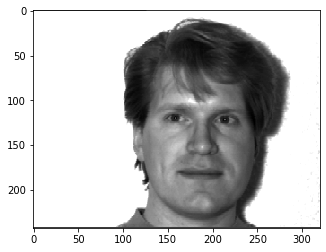

In [139]:
plt.imshow(X[0].reshape((243, 320)), cmap=plt.cm.gray)

In [140]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((243, 320))
    shifted_image = shift(image, [dy, dx], cval=255, mode="constant")
    return shifted_image.reshape([-1])

In [141]:
from scipy.ndimage.interpolation import rotate
def rotate_image(image, angle):
    image = image.reshape((243, 320))
    rotated_image = rotate(image, angle, reshape=False, cval=255)
    return rotated_image.reshape([-1])

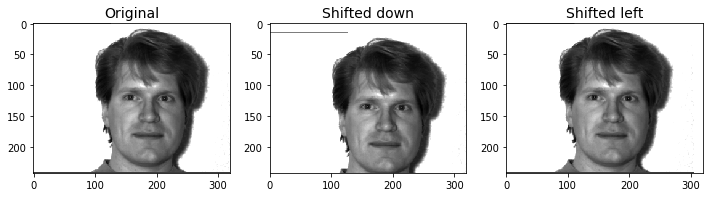

In [142]:
image = X[0]
shifted_image_down = shift_image(image, 0, 15)
shifted_image_left = shift_image(image, -15, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape((243, 320)), interpolation="nearest", cmap=plt.cm.gray)
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape((243, 320)), interpolation="nearest", cmap=plt.cm.gray)
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape((243, 320)), interpolation="nearest", cmap=plt.cm.gray)
plt.show()

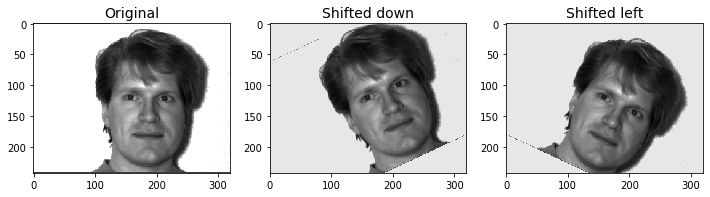

In [143]:
image = X[0]
rotated_image1 = rotate_image(image,25)
rotated_image2 = rotate_image(image,-25)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape((243, 320)), interpolation="nearest", cmap=plt.cm.gray)
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(rotated_image1.reshape((243, 320)), interpolation="nearest", cmap=plt.cm.gray)
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(rotated_image2.reshape((243, 320)), interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [144]:
idx0, idx1, idx2, idx3, idx4, idx5, idx6, idx7, idx8, idx9, idx10 = 0,0,0,0,0,0,0,0,0,0,0
for string in y:
    if string == 'centerlight':
        print(idx0)
        break
    idx0 += 1
for string in y:
    if string == 'glasses':
        print(idx1)
        break
    idx1 += 1
for string in y:
    if string == 'happy':
        print(idx2)
        break
    idx2 += 1
for string in y:
    if string == 'leftlight':
        print(idx3)
        break
    idx3 += 1
for string in y:
    if string == 'noglasses':
        print(idx4)
        break
    idx4 += 1
for string in y:
    if string == 'normal':
        print(idx5)
        break
    idx5 += 1
for string in y:
    if string == 'rightlight':
        print(idx6)
        break
    idx6 += 1
for string in y:
    if string == 'sad':
        print(idx7)
        break
    idx7 += 1
for string in y:
    if string == 'sleepy':
        print(idx8)
        break
    idx8 += 1
for string in y:
    if string == 'surprised':
        print(idx9)
        break
    idx9 += 1
for string in y:
    if string == 'wink':
        print(idx10)
        break
    idx10 += 1
print(len(y))

0
15
30
45
60
75
90
105
120
135
150
165


In [145]:
# Data Augmentation, add 12 augmented images per original image
extra_X = list(X)
extra_y = oElabels
for i in range(X.shape[0]):
    extra_X.append(shift_image(X[i], 0, 5).reshape(-1,1).flatten())
    extra_X.append(shift_image(X[i], 0, -5).reshape(-1,1).flatten())
    extra_X.append(shift_image(X[i], 5, 0).reshape(-1,1).flatten())
    extra_X.append(shift_image(X[i], -5, 0).reshape(-1,1).flatten())
    extra_X.append(shift_image(X[i], -2, 3).reshape(-1,1).flatten())
    extra_X.append(shift_image(X[i], 2, -3).reshape(-1,1).flatten())
    extra_X.append(shift_image(X[i], -2, -3).reshape(-1,1).flatten())
    extra_X.append(shift_image(X[i], 2, 3).reshape(-1,1).flatten())
    extra_X.append(rotate_image(X[i], -25).reshape(-1,1).flatten())
    extra_X.append(rotate_image(X[i], 25).reshape(-1,1).flatten())
    extra_X.append(rotate_image(X[i], -15).reshape(-1,1).flatten())
    extra_X.append(rotate_image(X[i], 15).reshape(-1,1).flatten())
for i in range(11):
    for j in range(12*15):
        extra_y.append(i)

In [146]:
import numpy as np
extra_X = np.array(extra_X)

In [147]:
extra_X.shape 

(2145, 77760)

In [148]:
len(extra_y)

2145

In [149]:
extra_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [151]:
extra_y = np.asarray(extra_y, dtype=np.int)

In [152]:
extra_y.shape

(2145,)

In [153]:
extra_y.reshape(-1,1).shape

(2145, 1)

In [154]:
dataset = np.append(extra_X, extra_y.reshape(-1,1), 1)

In [155]:
dataset

array([[130., 130., 130., ...,  68.,  68.,   0.],
       [130., 130., 130., ...,  68.,  68.,   0.],
       [130., 130., 130., ...,  68.,  68.,   0.],
       ...,
       [255., 255., 255., ..., 255., 255.,  10.],
       [255., 255., 255., ..., 255., 255.,  10.],
       [255., 255., 255., ..., 255., 255.,  10.]])

In [156]:
originalDataset = dataset

In [157]:
np.random.shuffle(dataset)

In [158]:
dataset

array([[255., 255., 255., ..., 255., 255.,   3.],
       [255., 255., 255., ..., 255., 255.,   6.],
       [255., 255., 255., ..., 255., 255.,   0.],
       ...,
       [255., 255., 255., ..., 255., 255.,   2.],
       [255., 255., 255., ..., 255., 255.,   9.],
       [130., 130., 130., ...,  68.,  68.,   5.]])

In [159]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [160]:
train_set.shape

(1716, 77761)

In [161]:
test_set.shape

(429, 77761)

In [162]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1:]
X_test = test_set[:,:-1]
y_test = test_set[:,-1:]

In [163]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1716, 77760)
(1716, 1)
(429, 77760)
(429, 1)


In [164]:
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier # MultiLayer Perceptron

# Compute a PCA 
# n_components = 132 # To go from 2914 features per instance to 100 features
pca = PCA(n_components=0.95, whiten=True).fit(X_train) # Whitening simply means to make the resulting data have a unit variance

# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [166]:
pca.components_.shape #185 pcas used to achieve 95% variance

(185, 77760)

In [167]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [175]:
from sklearn.ensemble import RandomForestClassifier

print("Fitting the classifier to the training set")
useMLP = True
if useMLP:
    clf = MLPClassifier(hidden_layer_sizes=(1024,500,700,550,800,550), activation='relu', 
                    solver='adam',batch_size=256, verbose=True, early_stopping=True, 
                    warm_start=True, max_iter=5000).fit(X_train_pca, y_train)
else:
    clf = RandomForestClassifier(n_estimators=10000).fit(X_train_pca, y_train)
# hidden_layer_sizes = (25,11,7,5,3,) means an architecture of input -> 25 neurons of the first hidden layer -> 11 neurons of the
# second hidden layer -> ... -> 3 neurons of the fifth hidden layer -> output

Fitting the classifier to the training set
Iteration 1, loss = 2.37630647
Validation score: 0.197674
Iteration 2, loss = 1.82278872
Validation score: 0.279070
Iteration 3, loss = 1.47491548
Validation score: 0.418605
Iteration 4, loss = 1.04475968
Validation score: 0.470930
Iteration 5, loss = 0.86995550
Validation score: 0.494186
Iteration 6, loss = 0.71446930
Validation score: 0.563953
Iteration 7, loss = 0.59976775
Validation score: 0.546512
Iteration 8, loss = 0.49992478
Validation score: 0.552326
Iteration 9, loss = 0.43406194
Validation score: 0.540698
Iteration 10, loss = 0.40165117
Validation score: 0.569767
Iteration 11, loss = 0.43420091
Validation score: 0.505814
Iteration 12, loss = 0.41761246
Validation score: 0.558140
Iteration 13, loss = 0.34886135
Validation score: 0.575581
Iteration 14, loss = 0.34968738
Validation score: 0.534884
Iteration 15, loss = 0.31830088
Validation score: 0.552326
Iteration 16, loss = 0.35504456
Validation score: 0.598837
Iteration 17, loss = 0

In [177]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024, 500, 700, 550, 800, 550),
              learning_rate='constant', learning_rate_init=0.001, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=True)

In [184]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 centerlight       0.87      0.87      0.87        38
     glasses       0.67      0.65      0.66        40
       happy       0.58      0.68      0.63        41
   leftlight       1.00      0.97      0.99        40
   noglasses       0.41      0.19      0.26        47
      normal       0.17      0.21      0.19        39
  rightlight       0.97      0.97      0.97        30
         sad       0.47      0.39      0.43        38
      sleepy       0.23      0.45      0.31        40
   surprised       1.00      0.51      0.68        39
        wink       0.49      0.49      0.49        37

    accuracy                           0.57       429
   macro avg       0.62      0.58      0.59       429
weighted avg       0.61      0.57      0.57       429



In [215]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[int(y_pred[i])]
        true_name = target_names[int(y_test[i])]
        yield 'pred: {0}\ntrue: {1}'.format(pred_name, true_name)

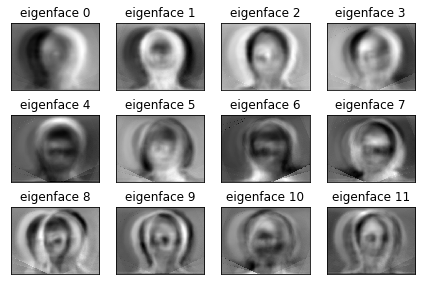

In [216]:
eigenfaces = pca.components_.reshape((pca.components_.shape[0], h, w)) # The eigenfaces are the "mean" faces, that preserve the most variance
eigenface_titles = ["eigenface {0}".format(i) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

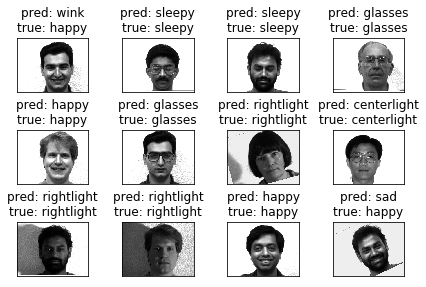

In [219]:
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)